In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import itertools

In [55]:
## Construct dataset across multiple months from 6am - 6pm
## Compare to just collisions vs. including hazards
##

## Station IDs for Interstate 80 - San Francisco - Oakland Bay Bridge

In [56]:
stationids_E = [402814, 402815,402816,402817, 420340,404896, 404921, 404886,404923, 404885, 404906, 404891,404908, 404889,404910,404892 ,404912, 404894, 404914, 404897, 404898,404899,401546, 404400 ]
stationids_W  = [402827,404918, 414758, 404920, 404883, 404922, 404884,404905,404887, 404907, 404888, 404909, 404890,404911, 404893,404913 ,404895 ,404915,404916,404917, 404415,404416]

In [57]:
days_months = [31, 28, 31, 30, 31, 30, 31, 30]

## Setting up Flow Files

In [58]:
files_jan_22 = []
for i in range(days_months[0]):
    files_jan_22.append("flows/jan_22/d04_text_station_5min_2022_01_" + str(i+1) + ".txt")

In [59]:
files_feb_22 = []
for i in range(days_months[1]):
    files_feb_22.append("flows/feb_22/d04_text_station_5min_2022_02_" + str(i+1) + ".txt")
files_feb_22.remove('flows/feb_22/d04_text_station_5min_2022_02_5.txt')

In [60]:
files_mar_22 = []
for i in range(days_months[2]):
    files_mar_22.append("flows/mar_22/d04_text_station_5min_2022_03_" + str(i+1) + ".txt")

In [61]:
files_apr_22 = []
for i in range(days_months[3]):
    files_apr_22.append("flows/apr_22/d04_text_station_5min_2022_04_" + str(i+1) + ".txt")

In [62]:
files_may_22 = []
for i in range(days_months[4]):
    files_may_22.append("flows/may_22/d04_text_station_5min_2022_05_" + str(i+1) + ".txt")

In [63]:
files_jun_22 = []
for i in range(days_months[5]):
    files_jun_22.append("flows/jun_22/d04_text_station_5min_2022_06_" + str(i+1) + ".txt")
files_jun_22.remove('flows/jun_22/d04_text_station_5min_2022_06_4.txt')

In [64]:
files_jul_22 = []
for i in range(days_months[6]):
    files_jul_22.append("flows/jul_22/d04_text_station_5min_2022_07_" + str(i+1) + ".txt")

In [65]:
files_aug_22 = []
for i in range(days_months[7]):
    files_aug_22.append("flows/aug_22/d04_text_station_5min_2022_08_" + str(i+1) + ".txt")
files_aug_22.remove('flows/aug_22/d04_text_station_5min_2022_08_27.txt')

In [66]:
dfs_jan_22 = {}
for f in files_jan_22:
    dfs_jan_22[f] = pd.read_csv(f)

In [67]:
dfs_feb_22 = {}
for f in files_feb_22:
    dfs_feb_22[f] = pd.read_csv(f)

In [68]:
dfs_mar_22 = {}
for f in files_mar_22:
    dfs_mar_22[f] = pd.read_csv(f)

In [69]:
dfs_apr_22 = {}
for f in files_apr_22:
    dfs_apr_22[f] = pd.read_csv(f)

In [70]:
dfs_may_22 = {}
for f in files_may_22:
    dfs_may_22[f] = pd.read_csv(f)

In [71]:
dfs_jun_22 = {}
for f in files_jun_22:
    dfs_jun_22[f] = pd.read_csv(f)

In [72]:
dfs_jul_22 = {}
for f in files_jul_22:
    dfs_jul_22[f] = pd.read_csv(f)

In [73]:
dfs_aug_22 = {}
for f in files_aug_22:
    dfs_aug_22[f] = pd.read_csv(f)

In [74]:
column_Names = ["Timestamp","Station","District","Route","Direction of Travel","Lane Type","Station Length","Samples", "% Observed", "Total Flow","Avg Occupancy","Avg Speed","Delay V_t=35","Delay V_t=40","Delay V_t=45","Delay V_t=50","Delay V_t=55","Delay V_t=60","Lane 1 Flow","Lane 1 Avg Occ","Lane 1 Avg Speed","Lane 2 Flow","Lane 2 Avg Occ","Lane 2 Avg Speed","Lane 3 Flow","Lane 3 Avg Occ","Lane 3 Avg Speed","Lane 4 Flow","Lane 4 Avg Occ","Lane 4 Avg Speed","Lane 5 Flow","Lane 5 Avg Occ","Lane 5 Avg Speed","Lane 6 Flow","Lane 6 Avg Occ","Lane 6 Avg Speed","Lane 7 Flow","Lane 7 Avg Occ","Lane 7 Avg Speed","Lane 8 Avg Occ","Lane 8 Avg Speed","Lane 9 Avg Occ", "F1", "F2", "F3", "F4","F5","F6", "F7", "F8", "F9","F10"]

In [75]:
dfs_jan_22_cp = dict(dfs_jan_22)
dfs_feb_22_cp = dict(dfs_feb_22)
dfs_mar_22_cp = dict(dfs_mar_22)
dfs_apr_22_cp = dict(dfs_apr_22)
dfs_may_22_cp = dict(dfs_may_22)
dfs_jun_22_cp = dict(dfs_jun_22)
dfs_jul_22_cp = dict(dfs_jul_22)
dfs_aug_22_cp = dict(dfs_aug_22)

In [76]:
for f in files_jan_22: 
    dfs_jan_22_cp[f].columns = column_Names
    dfs_jan_22_cp[f] = dfs_jan_22_cp[f][dfs_jan_22_cp[f]['Station'].isin(stationids_E)]
    dfs_jan_22_cp[f] = processHourlyData(dfs_jan_22_cp[f], days_months[0], 6, 14)

ValueError: Length mismatch: Expected axis has 9 elements, new values have 52 elements

In [28]:
for f in files_feb_22:
    dfs_feb_22_cp[f].columns = column_Names
    dfs_feb_22_cp[f] = dfs_feb_22_cp[f][dfs_feb_22_cp[f]['Station'].isin(stationids_E)]
    dfs_feb_22_cp[f] = processHourlyData(dfs_feb_22_cp[f], days_months[1], 6, 14)

ValueError: Length mismatch: Expected axis has 9 elements, new values have 52 elements

In [33]:
for f in files_mar_22:
    dfs_mar_22_cp[f].columns = column_Names
    dfs_mar_22_cp[f] = dfs_mar_22_cp[f][dfs_mar_22_cp[f]['Station'].isin(stationids_E)]
    dfs_mar_22_cp[f] = processHourlyData(dfs_mar_22_cp[f], days_months[2], 6, 14)

In [34]:
for f in files_apr_22:
    dfs_apr_22_cp[f].columns = column_Names
    dfs_apr_22_cp[f] = dfs_apr_22_cp[f][dfs_apr_22_cp[f]['Station'].isin(stationids_E)]
    dfs_apr_22_cp[f] = processHourlyData(dfs_apr_22_cp[f], days_months[3], 6, 14)

In [35]:
for f in files_may_22:
    dfs_may_22_cp[f].columns = column_Names
    dfs_may_22_cp[f] = dfs_may_22_cp[f][dfs_may_22_cp[f]['Station'].isin(stationids_E)]
    dfs_may_22_cp[f] = processHourlyData(dfs_may_22_cp[f], days_months[4], 6, 14)

In [36]:
for f in files_jun_22:
    dfs_jun_22_cp[f].columns = column_Names
    dfs_jun_22_cp[f] = dfs_jun_22_cp[f][dfs_jun_22_cp[f]['Station'].isin(stationids_E)]
    dfs_jun_22_cp[f] = processHourlyData(dfs_jun_22_cp[f], days_months[5], 6, 14)

In [37]:
for f in files_jul_22:
    dfs_jul_22_cp[f].columns = column_Names
    dfs_jul_22_cp[f] = dfs_jul_22_cp[f][dfs_jul_22_cp[f]['Station'].isin(stationids_E)]
    dfs_jul_22_cp[f] = processHourlyData(dfs_jul_22_cp[f], days_months[6], 6, 14)

In [38]:
for f in files_aug_22:
    dfs_aug_22_cp[f].columns = column_Names
    dfs_aug_22_cp[f] = dfs_aug_22_cp[f][dfs_aug_22_cp[f]['Station'].isin(stationids_E)]
    dfs_aug_22_cp[f] = processHourlyData(dfs_aug_22_cp[f], days_months[7], 6, 14)

In [77]:
for f in files_jan_22:
    dfs_jan_22_cp[f].to_csv('i80e/' + f)
for f in files_feb_22:
    dfs_feb_22_cp[f].to_csv('i80e/' + f)
for f in files_mar_22:
    dfs_mar_22_cp[f].to_csv('i80e/' + f)
for f in files_apr_22:
    dfs_apr_22_cp[f].to_csv('i80e/' + f)
for f in files_may_22:
    dfs_may_22_cp[f].to_csv('i80e/' + f)
for f in files_jun_22:
    dfs_jun_22_cp[f].to_csv('i80e/' + f)
for f in files_jul_22:
    dfs_jul_22_cp[f].to_csv('i80e/' + f)
for f in files_aug_22:
    dfs_aug_22_cp[f].to_csv('i80e/' + f)

In [78]:
dfs_jan_22_cp = {}
for f in files_jan_22:
    dfs_jan_22_cp[f] = pd.read_csv('i80e/' + f)

dfs_feb_22_cp = {}
for f in files_feb_22:
    dfs_feb_22_cp[f] = pd.read_csv('i80e/' + f)

dfs_mar_22_cp = {}
for f in files_mar_22:
    dfs_mar_22_cp[f] = pd.read_csv('i80e/' + f)
    
dfs_apr_22_cp = {}
for f in files_apr_22:
    dfs_apr_22_cp[f] = pd.read_csv('i80e/' + f)
    
dfs_may_22_cp = {}
for f in files_may_22:
    dfs_may_22_cp[f] = pd.read_csv('i80e/' + f)
    
dfs_jun_22_cp = {}
for f in files_jun_22:
    dfs_jun_22_cp[f] = pd.read_csv('i80e/' + f)
    
dfs_jul_22_cp = {}
for f in files_jul_22:
    dfs_jul_22_cp[f] = pd.read_csv('i80e/' + f)
    
dfs_aug_22_cp = {}
for f in files_aug_22:
    dfs_aug_22_cp[f] = pd.read_csv('i80e/' + f)

In [79]:
mean_flows_jan_22 = {}
for f in files_jan_22:
    mean_flow = dfs_jan_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_jan_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_jan_22[f] = merged 

In [80]:
mean_flows_feb_22 = {}
for f in files_feb_22:
    mean_flow = dfs_feb_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_feb_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_feb_22[f] = merged 

In [81]:
mean_flows_mar_22 = {}
for f in files_mar_22:
    mean_flow = dfs_mar_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_mar_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_mar_22[f] = merged 

In [82]:
mean_flows_apr_22 = {}
for f in files_apr_22:
    mean_flow = dfs_apr_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_apr_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_apr_22[f] = merged 

In [83]:
mean_flows_may_22 = {}
for f in files_may_22:
    mean_flow = dfs_may_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_may_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_may_22[f] = merged 

In [84]:
mean_flows_jun_22 = {}
for f in files_jun_22:
    mean_flow = dfs_jun_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_jun_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_jun_22[f] = merged 

In [85]:
mean_flows_jul_22 = {}
for f in files_jul_22:
    mean_flow = dfs_jul_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_jul_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_jul_22[f] = merged 

In [86]:
mean_flows_aug_22 = {}
for f in files_aug_22:
    mean_flow = dfs_aug_22_cp[f].groupby(by = "Timestamp")['Total Flow'].mean()
    mean_flow = mean_flow.reset_index()
    mean_flow.rename(columns={'Total Flow': 'Mean Flow'}, inplace=True)
    merged = pd.merge(dfs_aug_22_cp[f], mean_flow, left_on = 'Timestamp', right_on = 'Timestamp', how = 'right')
    merged = merged.drop_duplicates(subset=['Mean Flow'])
    mean_flows_aug_22[f] = merged 

## Setting Up Incident Files

In [120]:
incidents_jan_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_01.txt')
incidents_feb_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_02.txt')
incidents_mar_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_03.txt')
incidents_apr_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_04.txt')
incidents_may_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_05.txt')
incidents_jun_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_06.txt')
incidents_jul_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_07.txt')
incidents_aug_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_08.txt')

/var/folders/bd/5qqhrc7s7757lgrysdx1xbwr0000gn/T/ipykernel_83713/2767513838.py:1: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents_jan_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_01.txt')
/var/folders/bd/5qqhrc7s7757lgrysdx1xbwr0000gn/T/ipykernel_83713/2767513838.py:2: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents_feb_22 = pd.read_csv('incidents_files.txt/all_text_chp_incidents_month_2022_02.txt')


In [121]:
column_Names_Incidents = ['IncidentID', 'CCCode', 'IncidentNumber', 'Timestamp', 'Description', 'Location', 'Area', 'Zoom Map','TB xy', 'Latitude', 'Longitude','District' ,'County FIPS ID', 'City FIPS ID', 'Freeway Number','Freeway Direction', 'State Postmile', 'Absolute Postmile', 'Severity', 'Duration']
incidents_jan_22.columns = column_Names_Incidents
incidents_jan_22 = incidents_jan_22[incidents_jan_22['Freeway Number'] == 80]
incidents_jan_22= incidents_jan_22.loc[(incidents_jan_22['Absolute Postmile'] <= 6.74) & (incidents_jan_22['Absolute Postmile'] >= 2.79)]

incidents_feb_22.columns = column_Names_Incidents
incidents_feb_22 = incidents_feb_22[incidents_feb_22['Freeway Number'] == 80]
incidents_feb_22 = incidents_feb_22.loc[(incidents_feb_22['Absolute Postmile'] <= 6.74) & (incidents_feb_22['Absolute Postmile'] >= 2.79)]

incidents_mar_22.columns = column_Names_Incidents
incidents_mar_22 = incidents_mar_22[incidents_mar_22['Freeway Number'] == 80]
incidents_mar_22= incidents_mar_22.loc[(incidents_mar_22['Absolute Postmile'] <= 6.74) & (incidents_mar_22['Absolute Postmile'] >= 2.79)]

incidents_apr_22.columns = column_Names_Incidents
incidents_apr_22 = incidents_apr_22[incidents_apr_22['Freeway Number'] == 80]
incidents_apr_22 = incidents_apr_22.loc[(incidents_apr_22['Absolute Postmile'] <= 6.74) & (incidents_apr_22['Absolute Postmile'] >= 2.79)]

incidents_may_22.columns = column_Names_Incidents
incidents_may_22 = incidents_may_22[incidents_may_22['Freeway Number'] == 80]
incidents_may_22 = incidents_may_22.loc[(incidents_may_22['Absolute Postmile'] <= 6.74) & (incidents_may_22['Absolute Postmile'] >= 2.79)]

incidents_jun_22.columns = column_Names_Incidents
incidents_jun_22 = incidents_jun_22[incidents_jun_22['Freeway Number'] == 80]
incidents_jun_22 = incidents_jun_22.loc[(incidents_jun_22['Absolute Postmile'] <= 6.74) & (incidents_jun_22['Absolute Postmile'] >= 2.79)]

incidents_jul_22.columns = column_Names_Incidents
incidents_jul_22 = incidents_jul_22[incidents_jul_22['Freeway Number'] == 80]
incidents_jul_22 = incidents_jul_22.loc[(incidents_jul_22['Absolute Postmile'] <= 6.74) & (incidents_jul_22['Absolute Postmile'] >= 2.79)]

incidents_aug_22.columns = column_Names_Incidents
incidents_aug_22 = incidents_aug_22[incidents_aug_22['Freeway Number'] == 80]
incidents_aug_22 = incidents_aug_22.loc[(incidents_aug_22['Absolute Postmile'] <= 6.74) & (incidents_aug_22['Absolute Postmile'] >= 2.79)]

In [122]:
incidents_jan_22 = convertToDatetime(incidents_jan_22)
incidents_jan_22 = processHourlyIncidentData(incidents_jan_22, days_months[0], 6, 14)
incidents_jan_22 = incidents_jan_22[incidents_jan_22['Freeway Direction'] == 'E']

incidents_feb_22 = convertToDatetime(incidents_feb_22)
incidents_feb_22 = processHourlyIncidentData(incidents_feb_22, days_months[1], 6, 14)
incidents_feb_22 = incidents_feb_22[incidents_feb_22['Freeway Direction'] == 'E']

incidents_mar_22 = convertToDatetime(incidents_mar_22)
incidents_mar_22 = processHourlyIncidentData(incidents_mar_22, days_months[2], 6, 14)
incidents_mar_22 = incidents_mar_22[incidents_mar_22['Freeway Direction'] == 'E']


incidents_apr_22 = convertToDatetime(incidents_apr_22)
incidents_apr_22 = processHourlyIncidentData(incidents_apr_22, days_months[3], 6, 14)
incidents_apr_22 = incidents_apr_22[incidents_apr_22['Freeway Direction'] == 'E']

incidents_may_22 = convertToDatetime(incidents_may_22)
incidents_may_22 = processHourlyIncidentData(incidents_may_22, days_months[4], 6, 14)
incidents_may_22 = incidents_may_22[incidents_may_22['Freeway Direction'] == 'E']

incidents_jun_22 = convertToDatetime(incidents_jun_22)
incidents_jun_22 = processHourlyIncidentData(incidents_jun_22, days_months[5], 6, 14)
incidents_jun_22 = incidents_jun_22[incidents_jun_22['Freeway Direction'] == 'E']

incidents_jul_22 = convertToDatetime(incidents_jul_22)
incidents_jul_22 = processHourlyIncidentData(incidents_jul_22, days_months[6], 6, 14)
incidents_jul_22 = incidents_jul_22[incidents_jul_22['Freeway Direction'] == 'E']

incidents_aug_22 = convertToDatetime(incidents_aug_22)
incidents_aug_22 = processHourlyIncidentData(incidents_aug_22, days_months[7], 6, 14)
incidents_aug_22 = incidents_aug_22[incidents_aug_22['Freeway Direction'] == 'E']

Filter accident dataset by first accidents

In [123]:
first_accident_jan_22 = incidents_jan_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_feb_22 = incidents_feb_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_mar_22 = incidents_mar_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_apr_22 = incidents_apr_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_may_22 = incidents_may_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_jun_22 = incidents_jun_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_jul_22 = incidents_jul_22.groupby('day')['Timestamp'].min().reset_index()
first_accident_aug_22 = incidents_aug_22.groupby('day')['Timestamp'].min().reset_index()

In [124]:
no_acc_jan_22 = list(set(range(days_months[0] + 1)) -set(first_accident_jan_22['day']) - set([0]))
no_acc_feb_22 = list(set(range(days_months[1] + 1)) -set(first_accident_feb_22['day']) - set([0]))
no_acc_mar_22 = list(set(range(days_months[2] + 1)) -set(first_accident_mar_22['day']) - set([0]))
no_acc_apr_22 = list(set(range(days_months[3] + 1)) -set(first_accident_apr_22['day']) - set([0]))
no_acc_may_22 = list(set(range(days_months[4] + 1)) -set(first_accident_may_22['day']) - set([0]))
no_acc_jun_22 = list(set(range(days_months[5] + 1)) -set(first_accident_jun_22['day']) - set([0]))
no_acc_jul_22 = list(set(range(days_months[6] + 1)) -set(first_accident_jul_22['day']) - set([0]))
no_acc_aug_22 = list(set(range(days_months[7] + 1)) -set(first_accident_aug_22['day']) - set([0]))

In [125]:
set_jan = []
for day in no_acc_jan_22:
    set_jan += set_jan + ["flows/jan_22/d04_text_station_5min_2022_01_" + str(day) + ".txt"]
files_jan_22 = list(set(files_jan_22) - set(set_jan))

set_feb = []
for day in no_acc_feb_22:
    set_feb += set_feb + ["flows/feb_22/d04_text_station_5min_2022_02_" + str(day) + ".txt"]
files_feb_22 = list(set(files_feb_22) - set(set_feb))

set_mar = []
for day in no_acc_mar_22:
    set_mar += set_jan + ["flows/mar_22/d04_text_station_5min_2022_03_" + str(day) + ".txt"]
files_mar_22 = list(set(files_mar_22) - set(set_mar))

set_apr = []
for day in no_acc_apr_22:
    set_apr += set_apr + ["flows/apr_22/d04_text_station_5min_2022_04_" + str(day) + ".txt"]
files_apr_22 = list(set(files_apr_22) - set(set_apr))

set_may = []
for day in no_acc_may_22:
    set_may += set_may + ["flows/may_22/d04_text_station_5min_2022_05_" + str(day) + ".txt"]
files_may_22 = list(set(files_may_22) - set(set_may))

set_jun = []
for day in no_acc_jun_22:
    set_jun += set_jun + ["flows/jun_22/d04_text_station_5min_2022_06_" + str(day) + ".txt"]
files_jun_22 = list(set(files_jun_22) - set(set_jun))

set_jul = []
for day in no_acc_jul_22:
    set_jul += set_jul + ["flows/jul_22/d04_text_station_5min_2022_07_" + str(day) + ".txt"]
files_jul_22 = list(set(files_jul_22) - set(set_jul))

set_aug = []
for day in no_acc_aug_22:
    set_aug += set_aug + ["flows/aug_22/d04_text_station_5min_2022_08_" + str(day) + ".txt"]
files_aug_22 = list(set(files_aug_22) - set(set_aug))

In [126]:
str(13)

'13'

In [127]:
len(files_jul_22 + files_aug_22)

26

In [128]:
len(files_jan_22 + files_feb_22 + files_mar_22 + files_apr_22 + files_may_22 + files_jun_22 + files_jul_22 + files_aug_22)

117

In [129]:
accident_times_jan_22 = pd.to_datetime(first_accident_jan_22['Timestamp']).dt.time
accident_times_feb_22 = pd.to_datetime(first_accident_feb_22['Timestamp']).dt.time
accident_times_mar_22 = pd.to_datetime(first_accident_mar_22['Timestamp']).dt.time
accident_times_apr_22 = pd.to_datetime(first_accident_apr_22['Timestamp']).dt.time
accident_times_may_22 = pd.to_datetime(first_accident_may_22['Timestamp']).dt.time
accident_times_jun_22 = pd.to_datetime(first_accident_jun_22['Timestamp']).dt.time
accident_times_jul_22 = pd.to_datetime(first_accident_may_22['Timestamp']).dt.time
accident_times_aug_22 = pd.to_datetime(first_accident_aug_22['Timestamp']).dt.time

In [130]:
accident_times = len(accident_times_jan_22) + len(accident_times_feb_22) + len(accident_times_mar_22) + len(accident_times_apr_22) + len(accident_times_may_22) + len(accident_times_jun_22) + len(accident_times_jul_22) + len(accident_times_aug_22)

In [131]:
accident_times

125

[13, 11, 8, 13, 14, 11, 10, 12, 11, 6, 10, 10, 8, 10, 14, 9, 11, 9, 10, 12, 9, 7, 11, 13, 8, 7, 10, 6, 6, 7, 6, 14, 14, 9, 6, 12, 8, 6, 12, 12, 13, 13, 14, 10, 13, 12, 8, 8, 10, 11, 7, 12, 13, 10, 9, 6, 7, 8, 11, 9, 8, 7, 8, 12, 10, 11, 8, 14, 14, 10, 8, 10, 13, 13, 9, 11, 6, 14, 8, 13, 10, 12, 8, 12, 9, 14, 8, 6, 14, 12, 14, 10, 7, 11, 9, 8, 7, 8, 12, 10, 11, 8, 14, 14, 10, 8, 10, 13, 13, 8, 6, 7, 12, 8, 7, 13, 7, 11, 9, 12, 14, 9, 8, 12, 11]


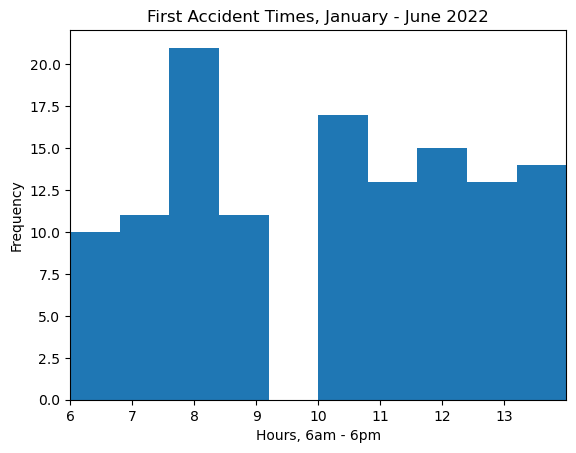

In [132]:
accident_times = list(accident_times_jan_22) + list(accident_times_feb_22) + list(accident_times_mar_22) + list(accident_times_apr_22) + list(accident_times_may_22) + list(accident_times_jun_22) + list(accident_times_jul_22) + list(accident_times_aug_22)
chart(accident_times)

In [133]:
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    print(hour_list)
    numbers=[x for x in range(6,14)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(6,14)
    plt.hist(hour_list)
    plt.title('First Accident Times, January - June 2022')
    plt.xlabel('Hours, 6am - 6pm')
    plt.ylabel('Frequency')
    plt.show()

## Create Accident + Flow Dataframe

In [134]:
for f in files_jan_22:
    mean_flows_jan_22[f].drop(mean_flows_jan_22[f].columns[0], axis=1, inplace=True)
for f in files_feb_22:
    mean_flows_feb_22[f].drop(mean_flows_feb_22[f].columns[0], axis=1, inplace=True)
for f in files_mar_22:
    mean_flows_mar_22[f].drop(mean_flows_mar_22[f].columns[0], axis=1, inplace=True)
for f in files_apr_22:
    mean_flows_apr_22[f].drop(mean_flows_apr_22[f].columns[0], axis=1, inplace=True)
for f in files_may_22:
    mean_flows_may_22[f].drop(mean_flows_may_22[f].columns[0], axis=1, inplace=True)
for f in files_jun_22:
    mean_flows_jun_22[f].drop(mean_flows_jun_22[f].columns[0], axis=1, inplace=True)
for f in files_jul_22:
    mean_flows_jul_22[f].drop(mean_flows_jul_22[f].columns[0], axis=1, inplace=True)
for f in files_aug_22:
    mean_flows_aug_22[f].drop(mean_flows_aug_22[f].columns[0], axis=1, inplace=True)

In [135]:
merged_a_f_jan_22 = {}
for f in files_jan_22: 
    merged_a_f_jan_22[f] = pd.merge(first_accident_jan_22, mean_flows_jan_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_jan_22[f].columns = cols
    merged_a_f_jan_22[f]['Accident Occurred'] = merged_a_f_jan_22[f]['First Accident Time'] <= merged_a_f_jan_22[f]['Timestamp']
    merged_a_f_jan_22[f] = merged_a_f_jan_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [136]:
merged_a_f_feb_22 = {}
for f in files_feb_22: 
    merged_a_f_feb_22[f] = pd.merge(first_accident_feb_22, mean_flows_feb_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_feb_22[f].columns = cols
    merged_a_f_feb_22[f]['Accident Occurred'] = merged_a_f_feb_22[f]['First Accident Time'] <= merged_a_f_feb_22[f]['Timestamp']
    merged_a_f_feb_22[f] = merged_a_f_feb_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [137]:
merged_a_f_mar_22 = {}
for f in files_mar_22: 
    merged_a_f_mar_22[f] = pd.merge(first_accident_mar_22, mean_flows_mar_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_mar_22[f].columns = cols
    merged_a_f_mar_22[f]['Accident Occurred'] = merged_a_f_mar_22[f]['First Accident Time'] <= merged_a_f_mar_22[f]['Timestamp']
    merged_a_f_mar_22[f] = merged_a_f_mar_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [138]:
merged_a_f_apr_22 = {}
for f in files_apr_22: 
    merged_a_f_apr_22[f] = pd.merge(first_accident_apr_22, mean_flows_apr_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_apr_22[f].columns = cols
    merged_a_f_apr_22[f]['Accident Occurred'] = merged_a_f_apr_22[f]['First Accident Time'] <= merged_a_f_apr_22[f]['Timestamp']
    merged_a_f_apr_22[f] = merged_a_f_apr_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [139]:
merged_a_f_may_22 = {}
for f in files_may_22: 
    merged_a_f_may_22[f] = pd.merge(first_accident_may_22, mean_flows_may_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_may_22[f].columns = cols
    merged_a_f_may_22[f]['Accident Occurred'] = merged_a_f_may_22[f]['First Accident Time'] <= merged_a_f_may_22[f]['Timestamp']
    merged_a_f_may_22[f] = merged_a_f_may_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [140]:
merged_a_f_jun_22 = {}
for f in files_jun_22: 
    merged_a_f_jun_22[f] = pd.merge(first_accident_jun_22, mean_flows_jun_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_jun_22[f].columns = cols
    merged_a_f_jun_22[f]['Accident Occurred'] = merged_a_f_jun_22[f]['First Accident Time'] <= merged_a_f_jun_22[f]['Timestamp']
    merged_a_f_jun_22[f] = merged_a_f_jun_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [141]:
merged_a_f_jul_22 = {}
for f in files_jul_22: 
    merged_a_f_jul_22[f] = pd.merge(first_accident_jul_22, mean_flows_jul_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_jul_22[f].columns = cols
    merged_a_f_jul_22[f]['Accident Occurred'] = merged_a_f_jul_22[f]['First Accident Time'] <= merged_a_f_jul_22[f]['Timestamp']
    merged_a_f_jul_22[f] = merged_a_f_jul_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [142]:
merged_a_f_aug_22 = {}
for f in files_aug_22: 
    merged_a_f_aug_22[f] = pd.merge(first_accident_aug_22, mean_flows_aug_22[f], left_on = 'day', right_on = 'day', how = 'right')
    cols = ['day', 'First Accident Time', 'Timestamp', 'StationID', 'Fwy', '% Observed', 'Total Flow','Avg Speed', 'hour','Mean Flow']
    merged_a_f_aug_22[f].columns = cols
    merged_a_f_aug_22[f]['Accident Occurred'] = merged_a_f_aug_22[f]['First Accident Time'] <= merged_a_f_aug_22[f]['Timestamp']
    merged_a_f_aug_22[f] = merged_a_f_aug_22[f].drop(['Total Flow', 'Avg Speed'], axis =1)

In [143]:
merged_a_f = merged_a_f_jan_22 | merged_a_f_feb_22 | merged_a_f_mar_22 | merged_a_f_apr_22 | merged_a_f_may_22 | merged_a_f_jun_22 | merged_a_f_jul_22 | merged_a_f_aug_22 

In [144]:
files_merged = files_jan_22 + files_feb_22 + files_mar_22 + files_apr_22 + files_may_22 + files_jun_22 + files_jul_22 + files_aug_22

In [145]:
len(files_merged)

117

In [146]:
sample_1 = random.sample(files_merged, 29)

In [147]:
sample_2 = list(set(files_merged) - set(sample_1))

## Construct Distribution 1

In [148]:
b1 = []
for f in files_merged: 
    get_row = np.where(((merged_a_f[f]['Accident Occurred'] != merged_a_f[f]['Accident Occurred'].shift(1)) & merged_a_f[f]['Accident Occurred']).values)[0]
    if_array_empty = get_row.size == 0 
    if if_array_empty:
        print(f)
    if not if_array_empty:
        get_flow = merged_a_f[f].iloc[get_row[0]]['Mean Flow'] 
        b1.append(get_flow)

flows/may_22/d04_text_station_5min_2022_05_16.txt


In [149]:
x,y = ecdf(b1)

In [150]:
y = [i * 100 for i in y]

NameError: name 'interx' is not defined

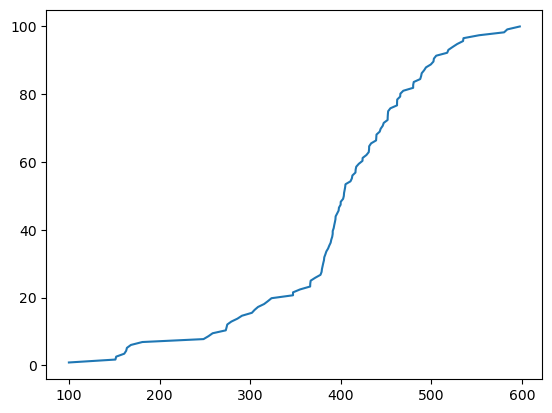

In [151]:
plt.plot(x,y)
plt.plot(interx, intery)
plt.title('Distribution $\hat{b}_1^N(x), N = 58$')
plt.xlabel('Flow')
plt.ylabel('$\mathbb{P}(X_{T_i} \leq x)$')

## Construct Distributions

In [152]:
counter = 0
for f in files_merged:
    counter += 1
    #print(len(dist2[f]))
print(counter)

117


In [153]:
dist2 = merged_a_f.copy()
for f in files_merged:
    dist2[f]['Time'] = pd.to_datetime(dist2[f]['Timestamp']).dt.time

In [154]:
for f in files_merged:
    firstacc = dist2[f]['Accident Occurred'].cumsum() == 1
    dist2[f]['Accident First'] = firstacc

In [155]:
timelist = {}
for f in files_merged: 
    timelist = list(set(dist2[f]['Time']).union(set(timelist)))
timelist.sort() 

In [156]:
counter = 0
for f in files_merged:
    true_false = dist2[f]['Accident First'].unique()
    if True in true_false:
        print(True)
        counter += 1
        print(counter)
    if True not in true_false:
        print(true_false)
        counter += 1
        print(counter)

True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
[False]
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105
True
106
True
107
True
108
True
109
True
110
True
111
True
112
True
113
True
114
True
115
True
116
True
117


\sum_{t=1}^{\infty} P(X_t < x) * P(A_t = 1 | A_{1:t} = 0)

In [157]:
accprob = {}
count = {}
traj_list = {}
for t in timelist: 
    accp = 0
    counter = 0
    traj = []
    for f in files_merged:
        if len(dist2[f][dist2[f]['Time'] == t]) != 0:
            counter += 1
            accp = accp + int(dist2[f][dist2[f]['Time'] == t]['Accident First'])
            if int(dist2[f][dist2[f]['Time'] == t]['Accident First']) != 0:
                traj = traj + [f]
    traj_list[t] = traj        
    count[t] = counter
    accprob[t] = accp

In [158]:
filtered_timelist = []
for t in timelist: 
    if len(traj_list[t]) != 0 :
        filtered_timelist = filtered_timelist + [t]

In [159]:
dictionary: times of first accident realization t -> {flows for trajectories for which there has been no accident till time }

SyntaxError: invalid syntax (3418449307.py, line 1)

In [160]:
times of first accident realization t -> {indices at which first accident occurred }

SyntaxError: invalid syntax (1927938929.py, line 1)

In [161]:
distrs = {}
for t in filtered_timelist:
    listt = []
    for f in files_merged:
        cond = dist2[f][dist2[f]['Time'] == t]['Accident First'] == True
        #print(cond)
        if len(cond) != 0:
            if list(cond)[0]:
                idx = dist2[f].iloc[dist2[f].index[dist2[f]['Accident First']==True].tolist()[0] - 1]
                listt = listt + [idx['Mean Flow']]
                print(f)
                distrs[t] = listt

flows/feb_22/d04_text_station_5min_2022_02_21.txt
flows/jun_22/d04_text_station_5min_2022_06_21.txt
flows/jun_22/d04_text_station_5min_2022_06_5.txt
flows/mar_22/d04_text_station_5min_2022_03_5.txt
flows/mar_22/d04_text_station_5min_2022_03_13.txt
flows/jan_22/d04_text_station_5min_2022_01_14.txt
flows/mar_22/d04_text_station_5min_2022_03_20.txt
flows/feb_22/d04_text_station_5min_2022_02_24.txt
flows/apr_22/d04_text_station_5min_2022_04_27.txt
flows/jul_22/d04_text_station_5min_2022_07_17.txt
flows/aug_22/d04_text_station_5min_2022_08_4.txt
flows/jul_22/d04_text_station_5min_2022_07_11.txt
flows/jul_22/d04_text_station_5min_2022_07_6.txt
flows/may_22/d04_text_station_5min_2022_05_7.txt
flows/jun_22/d04_text_station_5min_2022_06_28.txt
flows/aug_22/d04_text_station_5min_2022_08_11.txt
flows/apr_22/d04_text_station_5min_2022_04_28.txt
flows/feb_22/d04_text_station_5min_2022_02_28.txt
flows/aug_22/d04_text_station_5min_2022_08_9.txt
flows/aug_22/d04_text_station_5min_2022_08_5.txt
flows/a

In [162]:
distrs2 = {}
for t in filtered_timelist:
    listt = []
    for f in files_merged:
        cond = dist2[f][dist2[f]['Time'] == t]['Accident Occurred'] == False
        #print(cond)
        if len(cond) != 0:
            if list(cond)[0]:
                #idx = dist2[f].iloc[dist2[f].index[dist2[f]['Accident First']==False].tolist()[0] - 1]
                idx = dist2[f].iloc[dist2[f].index[dist2[f]['Time']==t].tolist()[0] - 1]
                #listt = listt + [dist2[f][dist2[f]['Time'] == t]['Mean Flow'].tolist()[0]]
                listt = listt + [idx['Mean Flow']]
                distrs2[t] = listt

In [163]:
t = filtered_timelist[-1]
for f in files_merged: 
    cond = dist2[f][dist2[f]['Time'] == t]['Accident First'] == True
    if len(cond) != 0:
        if list(cond)[0]:
            idx = dist2[f].iloc[dist2[f].index[dist2[f]['Time']==t].tolist()[0] - 1]
            listt = listt + [idx['Mean Flow']]
            distrs2[t] = listt

In [164]:
firstdict = {}
for t in timelist:
    list_traj = []
    for f in files_merged:
        cond = dist2[f][dist2[f]['Time'] == t]['Accident First'] == True
        if len(cond) != 0:
            if list(cond)[0]:
                list_traj = list_traj + [f]
                firstdict[t] = list_traj

In [165]:
distrs.keys() == distrs2.keys()

True

In [166]:
probsum = 0
for t in timelist: 
    probsum += accprob[t]/117

In [167]:
probsum

0.9914529914529916

In [168]:
sum_timelist = 0
for t in timelist:
    sum_timelist += accprob[t]

In [169]:
sum_timelist

116

In [170]:
su = 0
for t in timelist:
    su += accprob[t]

In [171]:
finalx = np.zeros(len(files_merged))
finaly = np.zeros(len(files_merged))
for t in timelist:
    x,y = ecdf(finaldist[t])
    newx = x*accprob[t]
    newy = y*accprob[t]
    finalx = np.add(newx, finalx)
    finaly = np.add(newy, finaly)

NameError: name 'finaldist' is not defined

In [172]:
x_values_jumps_Xgen, x_cdf_dict_Xgen = generate_cdf_Xgen(distrs2, firstdict, 116, len(timelist),
                      x_lower_bound = 50.0, x_upper_bound = 700, x_values_length = 1000, \
                      x_value_set_choice = 'Fixed')

In [173]:
x_values_jumps_XT, x_cdf_dict_XT = generate_cdf_XT(distrs, firstdict, 116, len(timelist),
                      x_lower_bound = 50.0, x_upper_bound = 700, x_values_length = 1000, \
                      x_value_set_choice = 'Fixed')

In [174]:
finalx = list(x_cdf_dict_Xgen.keys())
finaly = list(x_cdf_dict_Xgen.values())

In [175]:
interx = list(x_cdf_dict_XT.keys())
intery = list(x_cdf_dict_XT.values())

In [176]:
finaly = [i * 100 for i in finaly]

In [177]:
intery = [i * 100 for i in intery]

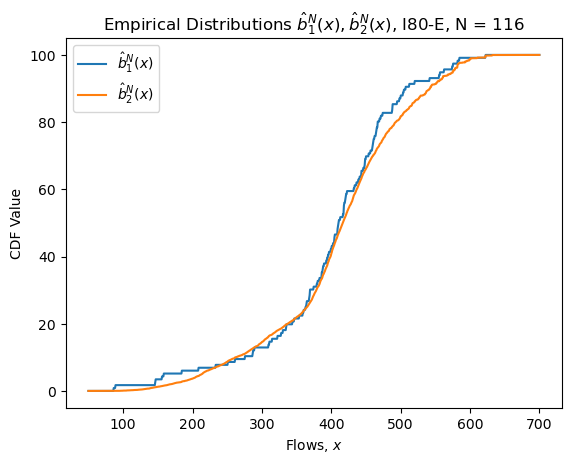

In [178]:
plt.title('Empirical Distributions $\hat{b}_1^N(x), \hat{b}_2^N(x)$, I80-E, N = 116')
plt.plot(interx,intery)
plt.plot(finalx, finaly)
plt.xlabel('Flows, $x$')
plt.ylabel('CDF Value')
plt.legend(['$\hat{b}_1^N(x)$', '$\hat{b}_2^N(x)$'])
plt.savefig('figs/i80e.png')

In [179]:
intery = np.array(intery)
finaly = np.array(finaly)
test_stat = np.max(np.subtract(intery, finaly))

In [180]:
test_stat

8.092993693887337

## Helper Functions

In [114]:
def processHourlyData(hour,numOfDay, rush_start, rush_end):
    hour = hour.rename(columns={'Station':'StationID'})
    hour = convertToDatetime(hour)
    listOfDay = list(range(1,numOfDay+1))
    hour = hour[['Timestamp','StationID','Route','% Observed','Total Flow','Avg Speed','hour','day']]
    hour = hour.rename(columns={'Route':'Fwy'})
    #hour = hour[(hour['% Observed'] >=80)] #& (hour['hour']==3)]
    hour = hour[(hour['hour']>= rush_start) & (hour['hour']<= rush_end)]
    hour = hour.dropna(subset=['Avg Speed'])
    filteredDays = hour['day'].unique().tolist()
    diff = list(set(listOfDay) - set(filteredDays))
    if len(diff) > 0:
        for i in diff:
            hour = hour.drop(hour[hour.day == i].index)
    return hour

In [115]:
def processHourlyIncidentData(hour,numOfDay, rush_start, rush_end):
    hour = hour.rename(columns={'Station':'StationID'})
    hour = convertToDatetime(hour)
    listOfDay = list(range(1,numOfDay+1))
    hour = hour[['IncidentID','Timestamp','Freeway Number','Freeway Direction','hour','day']]
    hour = hour.rename(columns={'Route':'Fwy'})
    #hour = hour[(hour['% Observed'] >=80)] #& (hour['hour']==3)]
    hour = hour[(hour['hour']>= rush_start) & (hour['hour']<= rush_end)]
    filteredDays = hour['day'].unique().tolist()
    diff = list(set(listOfDay) - set(filteredDays))
    if len(diff) > 0:
        for i in diff:
            hour = hour.drop(hour[hour.day == i].index)
    return hour

In [116]:
def convertToDatetime(df_hour):
    df_hour['Timestamp'] = pd.to_datetime(df_hour['Timestamp'], format='%m/%d/%Y %H:%M:%S')
    df_hour['hour']=df_hour['Timestamp'].dt.hour
    df_hour['day'] = df_hour['Timestamp'].dt.day
    return df_hour

In [117]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [118]:
def generate_cdf_Xgen(x_processed_dict_Xgen, first_times_dict, N, T, \
                      x_lower_bound = 50.0, x_upper_bound = 150.0, x_values_length = 1000, \
                      x_value_set_choice = 'Fixed'):
    assert list(x_processed_dict_Xgen.keys()) == list(first_times_dict.keys())
    
    x_values_jumps_Xgen = sorted(list(itertools.chain(*list(x_processed_dict_Xgen.values()))))
#     print("len(x_values_jumps_Xgen):", len(x_values_jumps_Xgen))
#     print("max(x_values_jumps_Xgen):", max(x_values_jumps_Xgen))
#     return
    
#     cdf_value_at_jumps_Xgen = []
    x_cdf_dict_Xgen = {}
    
    if x_value_set_choice == 'Fixed':
        x_value_array = np.linspace(x_lower_bound, x_upper_bound, x_values_length)
    elif x_value_set_choice == 'Jump values':
        x_value_array = x_values_jumps_Xgen
    else:
        assert 1 == 0, "Choose appropriate x_value_set_choice."
    
    for count_1, x_value in enumerate(x_value_array):
#         if count_1 % 100 == 0:
#             print(count_1)
        cdf_value_temp = 0
        for count_2, time in enumerate(first_times_dict.keys()):
#             print(count_2)
            cdf_value_temp += len([x_val for x_val in x_processed_dict_Xgen[time] if x_val <= x_value])/len(x_processed_dict_Xgen[time]) \
                                * len(first_times_dict[time])/N
#         cdf_value_at_jumps_Xgen.append(cdf_value_temp)
        x_cdf_dict_Xgen[x_value] = cdf_value_temp
    
    return x_values_jumps_Xgen, x_cdf_dict_Xgen

In [119]:
def generate_cdf_XT(x_processed_dict_XT, first_times_dict, N, T, \
                      x_lower_bound = 50.0, x_upper_bound = 150.0, x_values_length = 1000, \
                      x_value_set_choice = 'Fixed'):
    assert list(x_processed_dict_XT.keys()) == list(first_times_dict.keys())
    
    x_values_jumps_XT = sorted(list(itertools.chain(*list(x_processed_dict_XT.values()))))
    x_cdf_dict_XT = {}
    
    # Sort x_values_jumps_XT
    assert len(x_values_jumps_XT) <= N
    
#     print("len(x_values_jumps_XT):", len(x_values_jumps_XT))
#     print("max(x_values_jumps_XT):", max(x_values_jumps_XT))
        
    cdf_value_at_jumps_XT = []
    
    if x_value_set_choice == 'Fixed':
        x_value_array = np.linspace(x_lower_bound, x_upper_bound, x_values_length)
    elif x_value_set_choice == 'Jump values':
        x_value_array = x_values_jumps_XT
    else:
        assert 1 == 0, "Choose appropriate x_value_set_choice."
    
    for count_1, x_value in enumerate(x_value_array):
        cdf_value_temp = len([x_val for x_val in x_values_jumps_XT if x_val <= x_value]) \
                                     / len(x_values_jumps_XT)
        cdf_value_at_jumps_XT.append(cdf_value_temp)
        x_cdf_dict_XT[x_value] = cdf_value_temp

    cdf_evenly_spaced = np.linspace(1/len(cdf_value_at_jumps_XT), 1, len(cdf_value_at_jumps_XT))
        
#     print("cdf_value_at_jumps_XT:", cdf_value_at_jumps_XT[0:10])
#     print("cdf_evenly_spaced:", cdf_evenly_spaced[0:10])
#     print("1/len(cdf_value_at_jumps_XT):", 1/len(cdf_value_at_jumps_XT))
#     print("cdf_value_at_jumps_XT - cdf_evenly_spaced:", cdf_value_at_jumps_XT - cdf_evenly_spaced)


    # Assertion: Sanity check on cdf_value_at_jumps_XT
#     assert np.linalg.norm(np.array(cdf_value_at_jumps_XT) - np.array(cdf_evenly_spaced)) <= 0.0001
    
    return x_values_jumps_XT, x_cdf_dict_XT
